In [1]:
from PIL import Image

def upload_img(path):
  return Image.open("/content/" + path)

In [2]:
def perform_BI_CPU(arr):
  for i in range(len(arr)):
    for j in range(0, len(arr[i]) * 2, 2):
      arr[i].insert(j, arr[i][j])

  for i in range(0, len(arr) * 2, 2):
    arr.insert(i, arr[i])

In [3]:
import numpy as np

def process_and_show_img_from_list(img_list):
  img_array = np.array(img_list).astype(np.uint8)

  processed_img = Image.fromarray(img_array, 'RGB')
  display(processed_img)

def process_and_show_img_from_array(img_array):
  img_array = img_array.astype(np.uint8)

  processed_img = Image.fromarray(img_array, 'RGB')
  display(processed_img)

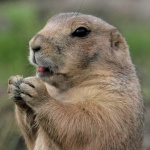

In [4]:
path = "image.jpg"

img = upload_img(path)
display(img)

In [5]:
from time import time


_________________________________________________________________________________________
CPU calculation: 

CPU time:  0.007308006286621094 


CPU result image: 



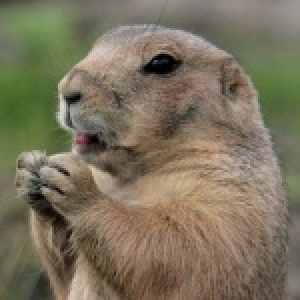

In [6]:
print("\n_________________________________________________________________________________________")
print("CPU calculation: ")

img_array_cpu = np.asarray(img)
img_list_cpu = img_array_cpu.tolist()

start_time = time()
perform_BI_CPU(img_list_cpu)
result_time = time() - start_time

print("\nCPU time: ", result_time, "\n")

print("\nCPU result image: \n")
process_and_show_img_from_list(img_list_cpu)

In [7]:
from numba import njit, jit, int32, cuda

@cuda.jit
def perform_BI_GPU(arr, result):
  idx = cuda.grid(1)
  
  cuda.syncthreads()

  if idx < result.shape[0]:
    for j in range(arr.shape[1]):
      for k in range(3):
        result[idx * 2][j * 2][k] = arr[idx][j][k]
        result[idx * 2][j * 2 + 1][k] = arr[idx][j][k]
        result[idx * 2 + 1][j * 2][k] = arr[idx][j][k]
        result[idx * 2 + 1][j * 2 + 1][k] = arr[idx][j][k]

In [8]:
blocks_per_grid = 1
threads_per_block = 256


_________________________________________________________________________________________
GPU calculation: 


/usr/local/lib/python3.7/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))



GPU time:  0.9683597087860107 


GPU result image: 



/usr/local/lib/python3.7/dist-packages/numba/cuda/cudadrv/devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


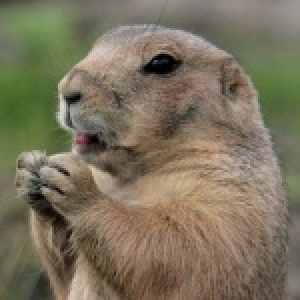

In [9]:
print("\n_________________________________________________________________________________________")
print("GPU calculation: ")

img_as_array = np.asarray(img)
img_list_gpu = img_as_array.tolist()

img_array_gpu = np.array(img)

result = np.ones([len(img_list_gpu)*2, len(img_list_gpu[0])*2, len(img_list_gpu[0][0])], dtype = int)

start_time = time()
perform_BI_GPU[blocks_per_grid, threads_per_block](img_array_gpu, result)
result_time = time() - start_time

print("\nGPU time: ", result_time, "\n")

print("\nGPU result image: \n")
process_and_show_img_from_array(result)